##Name-Jayesh Nishikant Inamdar,
##Skillsbuild id- jayeshinamdar316@gmail.com
##Domain - Data Analytics
##College name - Deogiri Institute od Engineering and Management Studies, Aurangabad
##State - Maharashtra
##Start date- 12/06/2023
##End date- 24/07/2023

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read superstore.csv dataset

superstore = pd.read_csv('SampleSuperstore.csv')

In [ ]:
# Review few rows of the dataset

superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Shape of data set

superstore.shape

(9994, 13)

In [ ]:
# Summarised information about the dataset

superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


1. Data Cleaning

In [ ]:
# Find the number of null values for all columns

superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# Find the number of duplicate data

superstore.duplicated().sum()

17

In [ ]:
# Show the duplicated rows

superstore[superstore.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [ ]:
# Drop the duplicated rows

superstore.drop_duplicates(inplace = True)

# Find the no. of rows and columns

superstore.shape

(9977, 13)

2. Exploratory Data Analytics

In [ ]:
# Q.1 Which Category is Best Selling and profitable One

# Group the columns (sales, profit and quantity) by category

category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


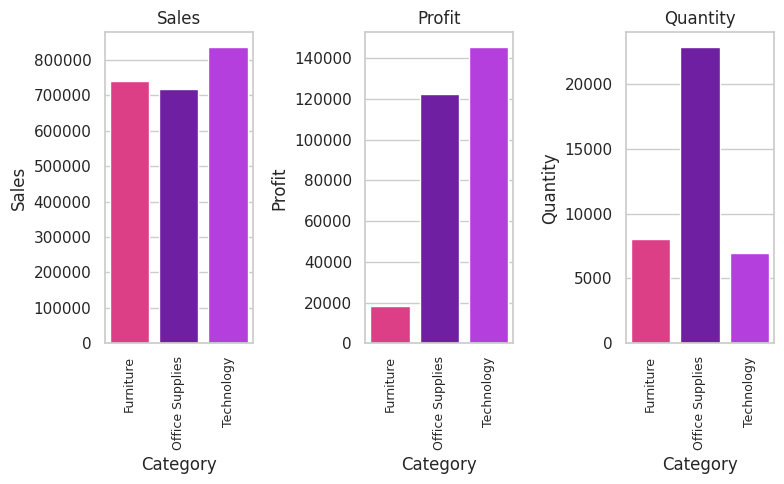

In [ ]:
# Sets for grouped plots


figure, axis = plt.subplots(1, 3, figsize=(8, 5))
#set colours to the graph
colors = ['#F72585','#7209B8','#C125F7','#F72531']

# Plot the barplots

categ1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0], palette = colors)
categ2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1], palette = colors)
categ3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2], palette = colors)

# Set titles to them

categ1.set(title = 'Sales')
categ2.set(title = 'Profit')
categ3.set(title = 'Quantity')

# Rotate axes for x-axis

plt.setp(categ1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(categ2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(categ3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots

figure.tight_layout()


In [ ]:
# Q.2 Which one is the most profitable region

#Group the columns (Region and Profit) by category

reg_analysis = pd.DataFrame(superstore.groupby(['Region'])['Profit'].sum().reset_index())
reg_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


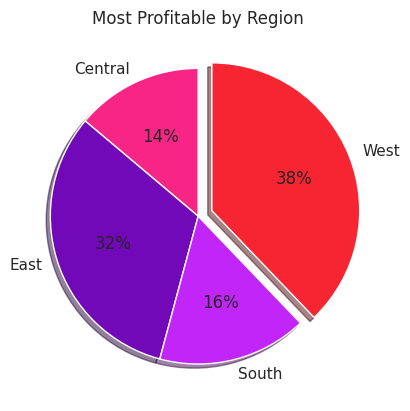

In [ ]:
# Plot Pie Chart
#set colours to the graph

colors = ['#F72585','#7209B8','#C125F7','#F72531']
explode = [0, 0, 0, 0.1]

plt.pie(reg_analysis.Profit, labels = reg_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode,colors=colors, shadow = True)
plt.title("Most Profitable by Region")
plt.show()


In [ ]:
# Q.3 Which City is the one with highest sales

#Group the columns (City,Sales and Quantity) by category and sort them in descending order
# to find first 7 Cities with highest sales

city_sales = pd.DataFrame(superstore.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales',ascending = False))
top = city_sales[:7]
top

<ipython-input-76-1588ae5cf447>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales = pd.DataFrame(superstore.groupby(['City'])['Sales','Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129


In [ ]:
#For 7 Cities with lowest sales

bottom = city_sales[-7:]
bottom

,Sales,Quantity
City,,
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1
Abilene,1.392,2


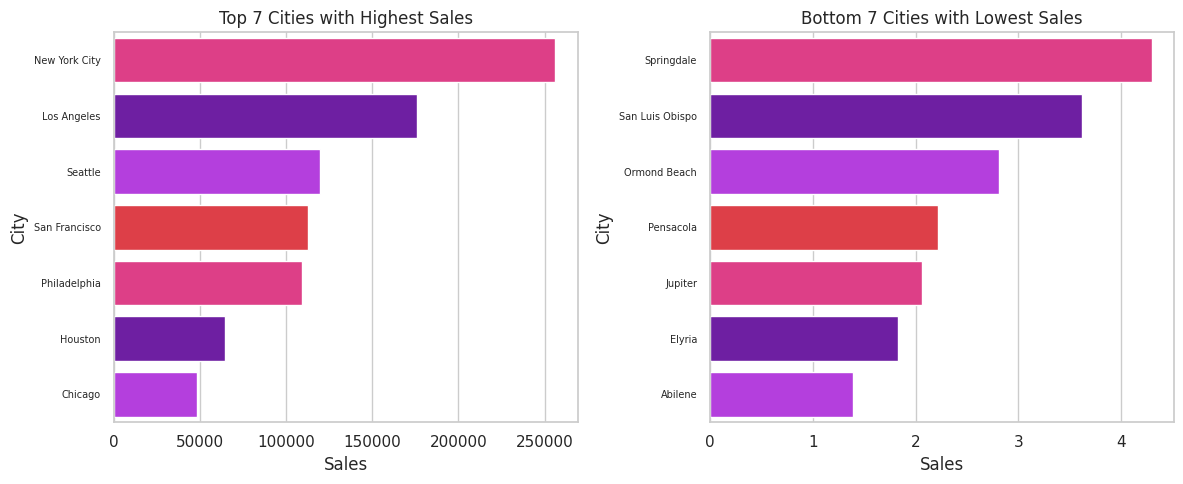

In [ ]:
# Set for grouped plots

figure, axis = plt.subplots(1, 2, figsize=(12, 5))

#set colours to the graph

colors = ['#F72585','#7209B8','#C125F7','#F72531']

tops = sns.barplot(data = top, y = top.index, x = top.Sales, palette = colors, ax = axis[0])
tops.set(title = "Top 7 Cities with Highest Sales")
tops.set_yticklabels(tops.get_yticklabels(),size = 7)

# Plot Bar Plot for Best Selling Sub-Category

bottoms = sns.barplot(data = bottom, y = bottom.index, x = bottom.Sales, palette = colors, ax=axis[1])
bottoms.set(title = "Bottom 7 Cities with Lowest Sales")
bottoms.set_yticklabels(bottoms.get_yticklabels(),size = 7)

# Set spacing between subplots

figure.tight_layout()
plt.show()